In [5]:
import numpy as np
import time
from sklearn import datasets
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np
from matplotlib import pyplot as plt
from ast import literal_eval

In [6]:
df = pd.read_csv("arxiv_embeddings.csv",converters={"categories_vectors": literal_eval})
df.head()

,id,title,categories,title_tokenized,categories_tokenized,categories_vectors
0,704.0001,calculation of prompt diphoton production cros...,['hep-ph'],calculation of prompt diphoton production cros...,[hep-ph],"[0.004738969728350639, -0.0558941513299942, 0...."
1,704.0002,sparsity-certifying graph decompositions,"['math', 'CO']",sparsity-certifying graph decompositions,"[math, CO]","[0.12043661624193192, -0.10650545358657837, 0...."
2,704.0003,the evolution of the earth-moon system based o...,"['physics', 'gen-ph']",the evolution of the earth-moon system based o...,"[physics, gen-ph]","[-0.08601149916648865, 0.3283824026584625, 0.4..."
3,704.0004,a determinant of stirling cycle numbers counts...,"['math', 'CO']",a determinant of stirling cycle numbers counts...,"[math, CO]","[0.12976428866386414, -0.2459404319524765, 0.0..."
4,704.0005,from dyadic $\lambda_{\alpha}$ to $\lambda_{\a...,"['math', 'CA']",from dyadic $\lambda_{\alpha}$ $\lambda_{\alpha}$,"[math, CA]","[0.07599613815546036, -0.04482531175017357, 0...."


In [7]:
class T2FCM: 
  def __init__(self, X, k, options):
    self.expo_lower = options[0]
    self.expo_upper = options[1]
    max_iter = options[2]
    min_impro = options[3]
    display = options[4]

    data_n = np.size(X, 0);
    self.obj_fcn = []

    U_lower= np.random.rand(k, data_n)
    col_sum_lower = np.sum(U_lower, axis=0)
    U_lower =np.divide(U_lower, col_sum_lower)
    U_upper = np.random.rand(k, data_n) 
    col_sum_upper = np.sum(U_upper, axis=0)
    U_upper = np.divide(U_upper, col_sum_upper)

    for i in range(0, max_iter):
          mf_lower = np.power(U_lower, self.expo_lower);
          mf_upper = np.power(U_upper,self.expo_upper);

          self.center_lower = np.divide(mf_lower@X,(np.sum(mf_lower,axis=1))[:,None]);
          self.center_upper = np.divide(mf_upper@X,(np.sum(mf_upper,axis=1))[:,None]);

          dist_lower = euclidean_distances(self.center_lower, X);
          dist_upper = euclidean_distances(self.center_upper, X);
          
          tmp_lower = np.power(dist_lower,(-2/(self.expo_lower-1)));
          U_m1 = np.divide(tmp_lower, np.sum(tmp_lower,axis=0));
          tmp_upper = np.power(dist_upper,(-2/(self.expo_upper-1)));
          U_m2 = np.divide(tmp_upper,np.sum(tmp_upper,axis=0));    
          
          U_lower = np.minimum(U_m1,U_m2);
          U_upper = np.maximum(U_m1,U_m2);
          U = np.mean(np.array([U_lower,U_upper]), axis=0);
          mf = np.power(U,((self.expo_lower+self.expo_upper)/2))

          self.center = np.mean(np.array([self.center_lower,self.center_upper]), axis=0);
          dist = euclidean_distances(self.center, X)
          self.obj_fcn.append(np.sum(np.multiply(np.power(dist,2),mf)))

           

  def MF_Compute(self, X):
    dist_lower = euclidean_distances(self.center_lower, X);
    print(self.center_lower)
    print(X)
    dist_upper = euclidean_distances(self.center_upper, X);
    
          
    tmp_lower = np.power(dist_lower,(-2/(self.expo_lower-1)));
    U_m1 = np.divide(tmp_lower, np.sum(tmp_lower,axis=0));
    tmp_upper = np.power(dist_upper,(-2/(self.expo_upper-1)));
    U_m2 = np.divide(tmp_upper,np.sum(tmp_upper,axis=0));    
          
    U_lower = np.minimum(U_m1,U_m2);
    U_upper = np.maximum(U_m1,U_m2);
    U = np.mean(np.array([U_lower,U_upper]), axis=0);
    mf = np.power(U,((self.expo_lower+self.expo_upper)/2))
    return mf

  def predict(self, tst): 
    dist = euclidean_distances(self.center, tst)
    mf = self.MF_Compute(tst)
    pred= np.multiply(np.power(dist,2),mf)
    return pred

In [8]:
X = np.array(df.categories_vectors.values.tolist())

[[ 0.03102086 -0.05367628  0.05674519  0.07548056  0.0020104  -0.07564587
   0.01804535  0.03832157 -0.06618823 -0.02300644  0.06029641 -0.04810589
  -0.00072992 -0.00456503 -0.01895977  0.04923664 -0.03094713  0.00859257
   0.00053873  0.0511523   0.05846186  0.08580174  0.08308032 -0.07843724
  -0.00268648  0.09131929 -0.07688735  0.02207093  0.03008154 -0.03980833
  -0.01685069 -0.03060452 -0.03706437 -0.07260203  0.00155919  0.01735556
   0.02154879  0.00481696  0.06465259  0.01925417 -0.00841372  0.00232225
  -0.03238048 -0.03896452  0.06577616 -0.00166287 -0.0371136  -0.01714927
  -0.01521513  0.05218446  0.03262472  0.02222271  0.03574987  0.05234503
   0.05910413 -0.0051805   0.05537068 -0.08112295 -0.02403567 -0.02421716
  -0.05108579 -0.03782504 -0.02703718 -0.00707071]
 [ 0.03102086 -0.05367628  0.05674519  0.07548056  0.0020104  -0.07564587
   0.01804535  0.03832157 -0.06618823 -0.02300644  0.06029641 -0.04810589
  -0.00072992 -0.00456503 -0.01895977  0.04923664 -0.03094713

array([1, 1, 0, ..., 0, 1, 0])

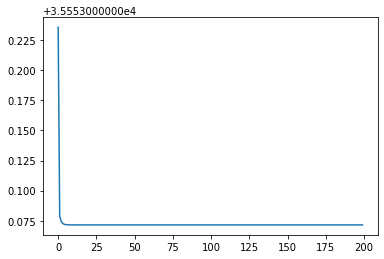

In [9]:
k=3
opts = [1.5 , 2.5 , 200 , 1e-5, 0]
ob = T2FCM(X, k, opts)
plt.plot(ob.obj_fcn)
dec = ob.predict(X)
np.argmax(dec, axis=0)

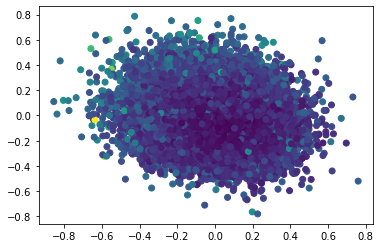

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=dec[2,:])

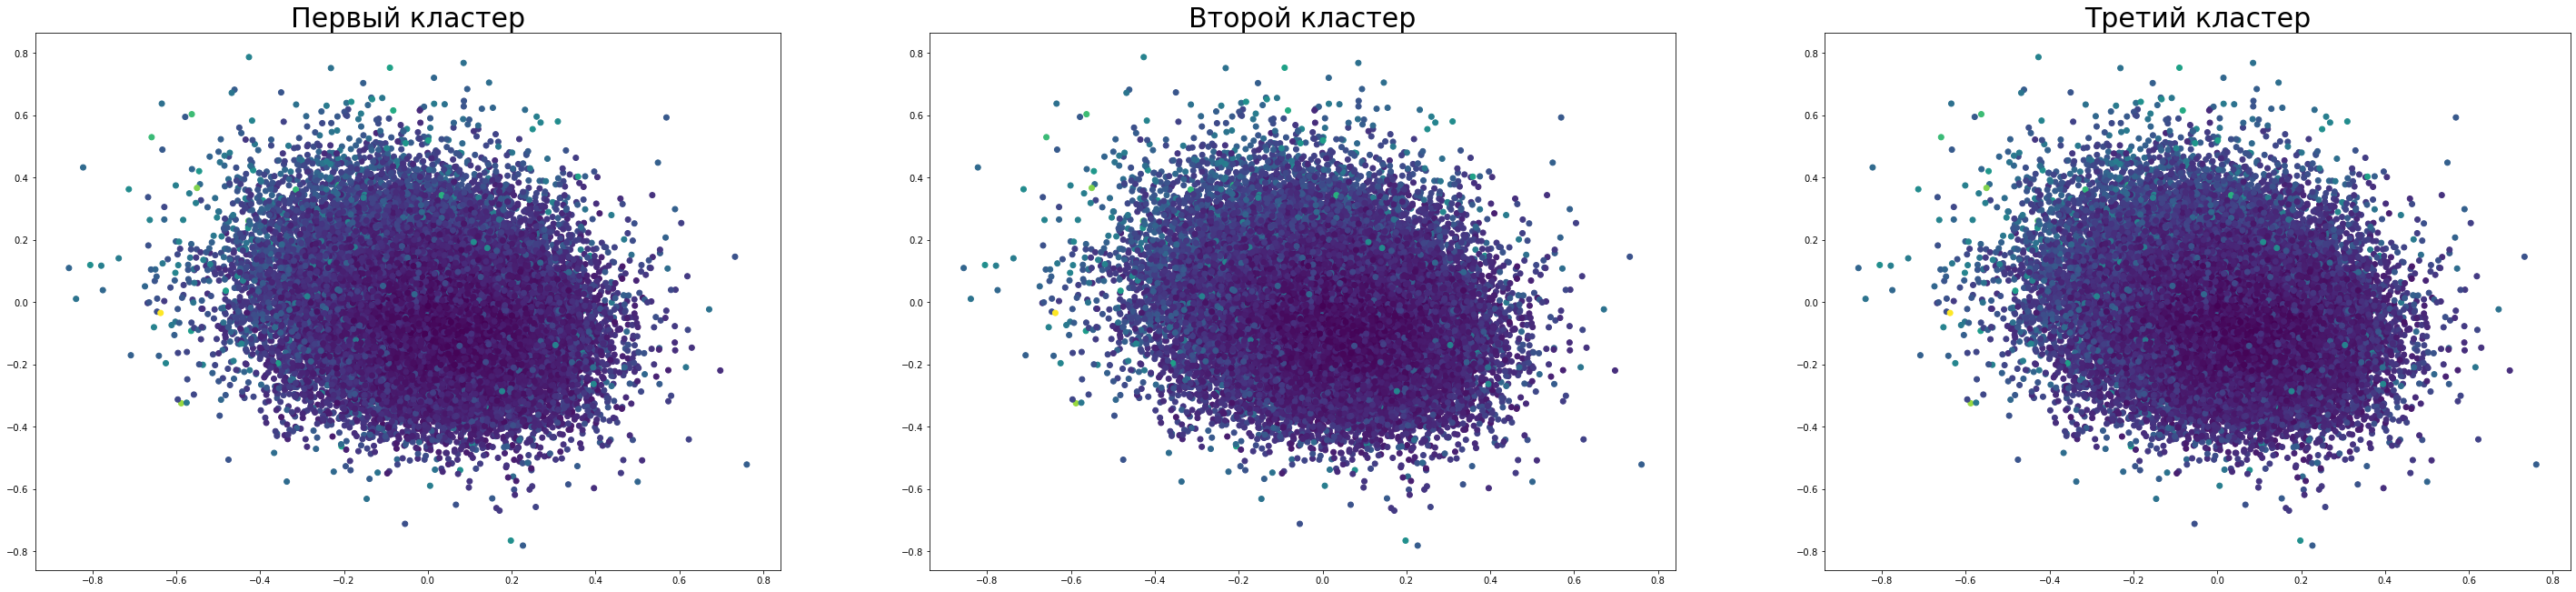

In [11]:
plt.figure(figsize=(50, 50))
plt.subplot(431)
plt.gca().set_title('Первый кластер', fontsize = 30)
plt.scatter(X[:, 0], X[:, 1], c=dec[0,:])
plt.subplot(432)
plt.gca().set_title('Второй кластер', fontsize = 30)
plt.scatter(X[:, 0], X[:, 1], c=dec[1,:])
plt.subplot(433)
plt.gca().set_title('Третий кластер', fontsize = 30)
plt.scatter(X[:, 0], X[:, 1], c=dec[2,:])

In [12]:
import numpy as np

def xie_beni(X, labels):
   
    n_clusters = len(np.unique(labels))
    n_samples = X.shape[0]
    n_features = X.shape[1]

    centroids = np.zeros((n_clusters, n_features))
    for i in range(n_clusters):
        centroids[i, :] = utils.centroid(X[labels == i, :])

    compactness = 0
    for i in range(n_clusters):
        compactness += np.sum(np.square(X[labels == i, :] - centroids[i, :]))


    min_dist = np.inf
    for i in range(n_clusters):
        for j in range(i + 1, n_clusters):
            dist = utils.euc_dis(centroids[i, :], centroids[j, :])
            if dist < min_dist:
                min_dist = dist
    
    min_dist_squared = min_dist * min_dist
    separability = n_samples * min_dist_squared


    return compactness / separability

In [13]:
def find_best_cluster_count(X, max_count, func):
    best_count = 1
    best_score = -1
    all_scores = list()
    for num in range(3, max_count + 1):
        centers, L = func(X.T, 3, 2)
        xb = xie_beni(X, L)
        all_scores.append(xb)
        if xb > best_score:
            best_count = num
            best_score = xb
    return best_count, best_score, all_scores

In [17]:
clusters_count, score, scores = find_best_cluster_count(X, 12, t2fcm)
res

6


Оптимальное количество кластеров = 6. Запускаем T2FCM для 6 кластеров.

[[ 0.03102086 -0.05367628  0.05674519  0.07548056  0.0020104  -0.07564587
   0.01804535  0.03832157 -0.06618823 -0.02300644  0.06029641 -0.04810589
  -0.00072992 -0.00456503 -0.01895977  0.04923664 -0.03094713  0.00859257
   0.00053873  0.0511523   0.05846186  0.08580174  0.08308032 -0.07843724
  -0.00268648  0.09131929 -0.07688735  0.02207093  0.03008154 -0.03980833
  -0.01685069 -0.03060452 -0.03706437 -0.07260203  0.00155919  0.01735556
   0.02154879  0.00481696  0.06465259  0.01925417 -0.00841372  0.00232225
  -0.03238048 -0.03896452  0.06577616 -0.00166287 -0.0371136  -0.01714927
  -0.01521513  0.05218446  0.03262472  0.02222271  0.03574987  0.05234503
   0.05910413 -0.0051805   0.05537068 -0.08112295 -0.02403567 -0.02421716
  -0.05108579 -0.03782504 -0.02703718 -0.00707071]
 [ 0.03102086 -0.05367628  0.05674519  0.07548056  0.0020104  -0.07564587
   0.01804535  0.03832157 -0.06618823 -0.02300644  0.06029641 -0.04810589
  -0.00072992 -0.00456503 -0.01895977  0.04923664 -0.03094713

array([5, 5, 0, ..., 0, 0, 3])

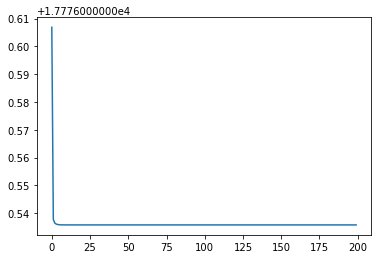

In [18]:
k=6
opts = [1.5 , 2.5 , 200 , 1e-5, 0]
ob = T2FCM(X, k, opts)
plt.plot(ob.obj_fcn)
dec = ob.predict(X)
np.argmax(dec, axis=0)